In [21]:
# Antes de empezar con el estudio del dataset hacemos los imports que son necesarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Y leemos el dataset sobre el cuál vamos a estar realizando el estudio

df = pd.read_csv("car_price_dataset.csv")

In [20]:
# En este estudio cogeremos este dataset que se trata del precio de vehiculos dandonos información sobre estos

# Para empezar imprimimos las 10 primeras líneas para saber como esta estructurado este dataset

print(df.head(10))

        Brand     Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia       Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet    Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes       GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi        Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
5      Toyota     Camry  2007          2.7    Petrol       Automatic   157889   
6       Honda     Civic  2010          3.4  Electric       Automatic   139584   
7         Kia  Sportage  2001          4.7  Electric  Semi-Automatic   157495   
8         Kia  Sportage  2014          2.6    Hybrid          Manual    98700   
9      Toyota      RAV4  2005          3.1    Petrol          Manual   107724   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4       

In [16]:
# Seguimos comprobando cuál es la longitud de este dataset, en este caso hay un total de 10000 registros

print(f"Longitud del dataset {len(df)}")

Longitud del dataset 10000


In [12]:
# Procedemos a borrar cualquier campo que sea un null y volvemos a comprobar si la longitud del dataset a cambiado o no

df_clean = df.dropna()
print(f"Longitud del dataset después de eliminar los valores nulos {len(df)}")

Longitud del dataset después de eliminar los valores nulos 10000


In [12]:
# Ahora calculamos la mediana, el máximo y el mínimo sobre la columna del precio, observamos como la media de los precios de los vehiculos es de 8853€ redondeando lo cuál nos
# indica que los precios de los vehiculos registrados en este datatset no son muy elevados

print("Precio medio:", df_clean['Price'].mean())
print("Precio máximo:", df_clean['Price'].max())
print("Precio mínimo:", df_clean['Price'].min())

Precio medio: 8852.9644
Precio máximo: 18301
Precio mínimo: 2000


In [13]:
# También calculamos la media del kilometraje de entre todos los vehiculos

print("Media de kilometros", df_clean['Mileage'].mean())

Kilometraje medio: 149239.1118


In [4]:
# Por otro lado calculo de que año son los vehiculos mas antiguos dando como resultado que hay resgistrdos un total de 393 coches del año 2000

min_year = df['Year'].min()  
antiguo = df[df['Year'] == min_year]
print("Coches más antiguos")
print(antiguo)

Coches más antiguos
           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
18           Kia       Rio  2000          3.4    Diesel  Semi-Automatic   
21        Toyota      RAV4  2000          4.6    Hybrid  Semi-Automatic   
37           Kia  Sportage  2000          1.4  Electric          Manual   
42         Honda     Civic  2000          3.9    Hybrid          Manual   
66    Volkswagen      Golf  2000          4.0    Hybrid          Manual   
...          ...       ...   ...          ...       ...             ...   
9911     Hyundai   Elantra  2000          1.5    Petrol       Automatic   
9932         Kia       Rio  2000          3.4    Hybrid          Manual   
9945       Honda    Accord  2000          2.8    Petrol       Automatic   
9946      Toyota      RAV4  2000          2.0    Petrol  Semi-Automatic   
9982        Ford    Fiesta  2000          1.5    Hybrid  Semi-Automatic   

      Mileage  Doors  Owner_Count  Price  
18     257427      3            3   

In [5]:
# Procedo también a averiguar cuantos vehiculos hay de cada tipo de transmisión que en este caso contamos con transmisión manual, automática y semiautomática

transmision = df['Transmission'].value_counts()
print("Cantidad de coches por tipo de transmisión")
print(transmision)


Cantidad de coches por tipo de transmisión
Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64


In [6]:
# En este caso calculamos cuál es la marca con el vehiculo mas caro del todo el dataset dandonos como resultados que el coche con el valor mas elevado es
# un Toyota Corolla del 2021 con un precio de 18301€

precio = df['Price'].max()       
coche = df[df['Price'] == precio]
print("Coche más caro")
print(coche)


Coche más caro
       Brand    Model  Year  Engine_Size Fuel_Type Transmission  Mileage  \
1100  Toyota  Corolla  2021          4.7  Electric    Automatic    14924   

      Doors  Owner_Count  Price  
1100      5            3  18301  


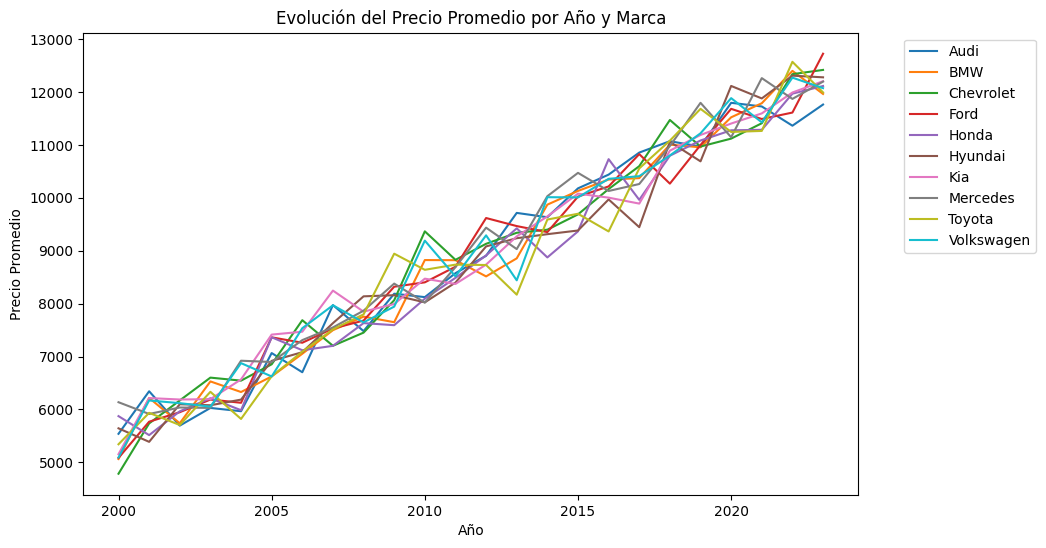

In [19]:
# A partir de ahora comenzamos con los diagramas, para empezar en este vemos reflejado la evolución del precio medio por año y marca de los vehiculos registrados en el dataset
# Como se observa vemos que todas las marcas se distribuyen de manera prácticamente igual entre ellas viendo que el precio medio por vehiculo a lo que han ido pasando los 
# años cada vez se han ido encareciendo mas y mas

df_year_brand = df.groupby(['Year', 'Brand'])['Price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year_brand, x='Year', y='Price', hue='Brand')
plt.title("Evolución del Precio Promedio por Año y Marca")
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


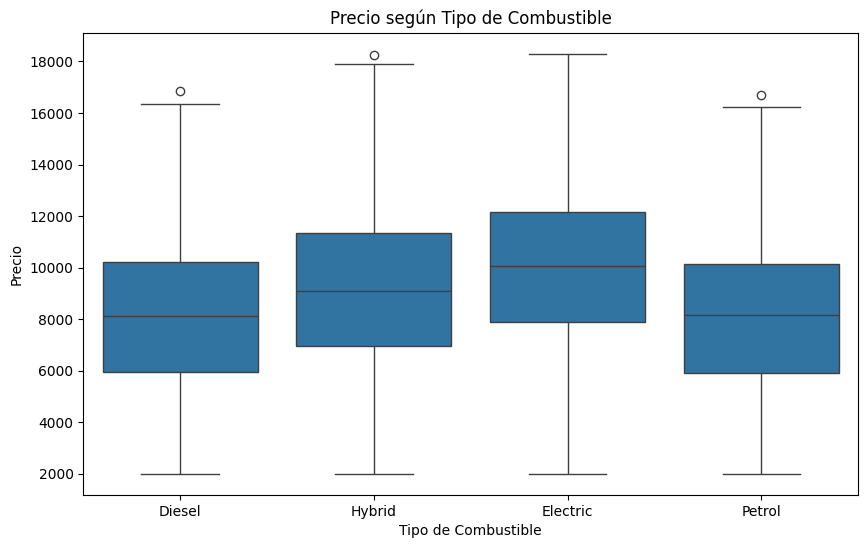

In [18]:
# Aqui estamos comparando el precio medio según el tipo de combustible de los vehiculos sacando como conclusión que los vehiculos con motor electrico son los mas caros,
# seguido por los motores hibridos siguiendo los de diesel y por último los gasolina

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df_clean)
plt.title("Precio según Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio")
plt.show()

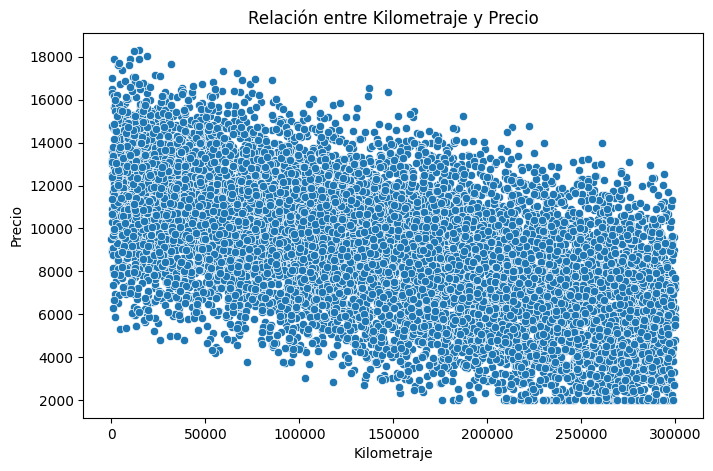

In [16]:
# Seguimos con este otro diagrama en el cúal hacemos una relación entre el precio y el kilometraje de los vehiculos observando como a mas kilometraje tiene cada coche
# el precio va disminuyendo mientras que a menor kilometraje el precio va en aumento

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage', y='Price', data=df_clean)
plt.title("Relación entre Kilometraje y Precio")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.show()


In [15]:
# Calculamos el precio promedio de todos los vehiculos filtrandolo por marca observando como los vehiculos de la marca Chevrolet suelen ser los mas caros y los honda los mas baratos

media = df_clean.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print(media)

Brand
Chevrolet     9015.683948
Mercedes      8980.087049
Audi          8929.373796
Volkswagen    8928.377451
Kia           8880.086066
Ford          8852.570611
Toyota        8798.184536
Hyundai       8778.279397
BMW           8704.068068
Honda         8665.596630
Name: Price, dtype: float64


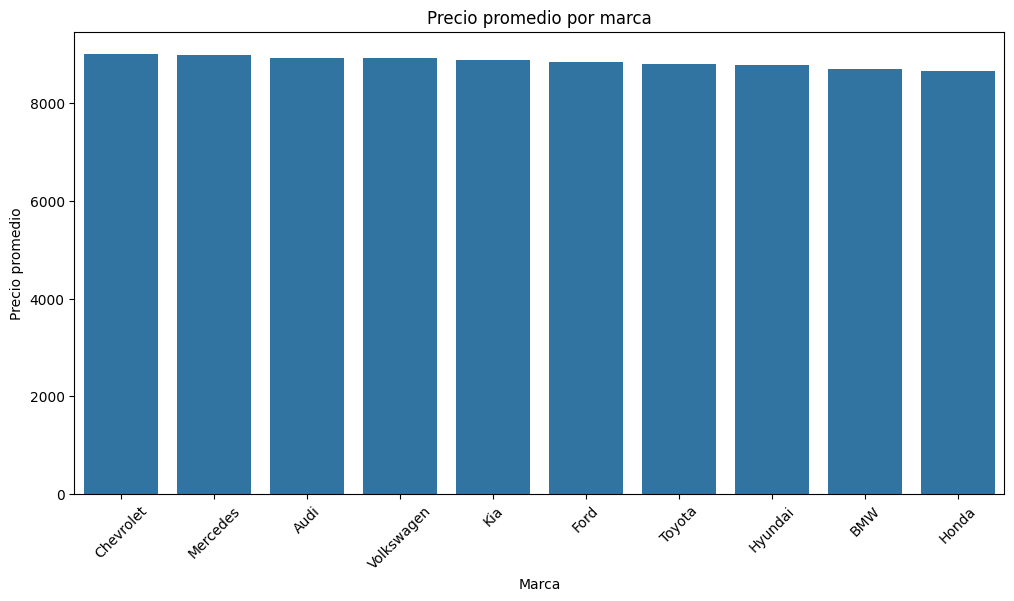

In [17]:
# Aprovechando los datos del apartado anterior visualizamos ahora un diagrama de barras enseñando de forma gráfica el precio medio por marca que como ya explique antes 
# los vehiculos de Chevrolet son los mas caros que hay registrados en este dataset

plt.figure(figsize=(12, 6))
sns.barplot(x=media.index, y=media.values)
plt.xticks(rotation=45)
plt.title("Precio promedio por marca")
plt.xlabel("Marca")
plt.ylabel("Precio promedio")
plt.show()